In [73]:
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.cross_validation import cross_val_score


In [74]:
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final=pd.read_sql_query(""" SELECT * FROM Reviews  """, conn) 

In [75]:
final.to_sql('Reviews', conn,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)
# Sorting data based on time
final["Time"] = pd.to_datetime(final["Time"], unit = "s")
final= final.sort_values(by = "Time")

In [76]:
x = final['CleanedText'].values

In [77]:
count_vect = CountVectorizer() 
data = count_vect.fit_transform(x)


In [78]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5,6,7,8,9,10]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(data)
    loss.append(kmeans.inertia_)

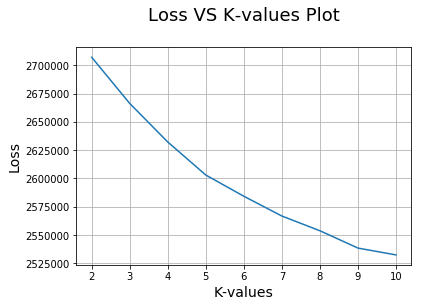

In [79]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()



In [80]:
optimal_k = 5
# Variable that will be used in the conclusion 
bow_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(data)

In [81]:
reviews = final['Text'].values
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(reviews[i])
    else :
        cluster5.append(reviews[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  1065

No. of reviews in Cluster-2 :  1779

No. of reviews in Cluster-3 :  36058

No. of reviews in Cluster-4 :  5625

No. of reviews in Cluster-5 :  1545


In [82]:
import sys
sys.path.append('c://users/melvi/appdata/local/programs/python/python36/lib/site-packages')

from wordcloud import WordCloud

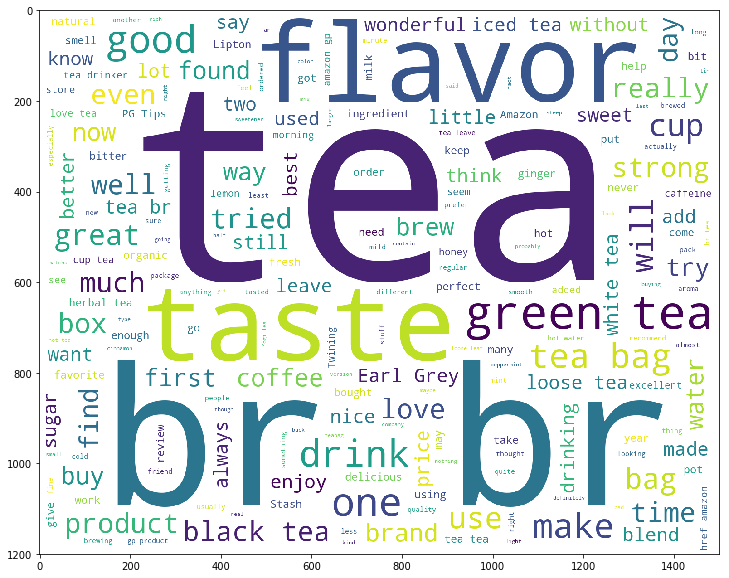

In [83]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)


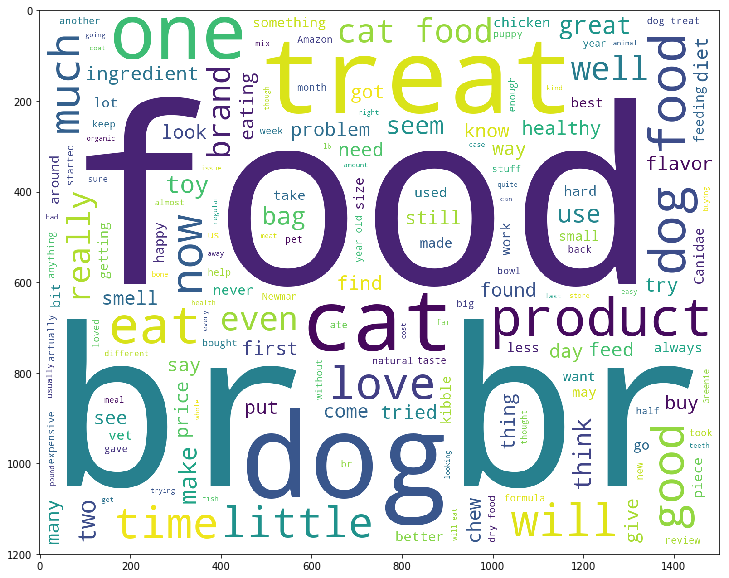

In [84]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

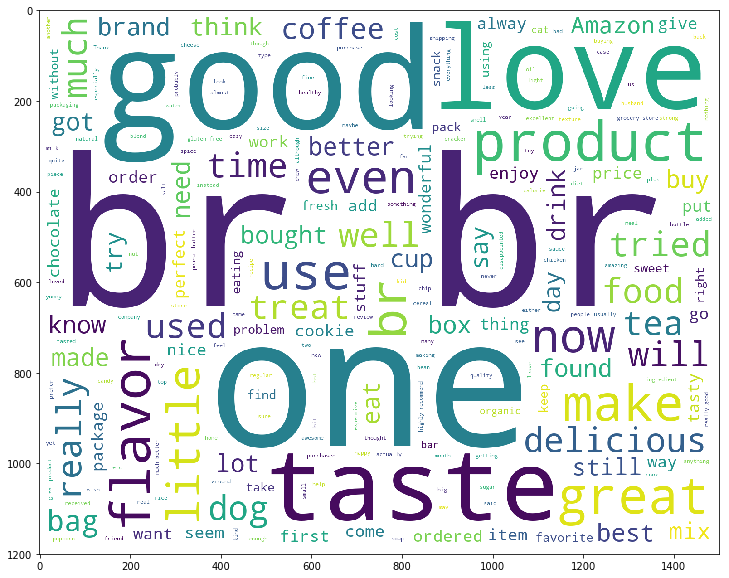

In [85]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

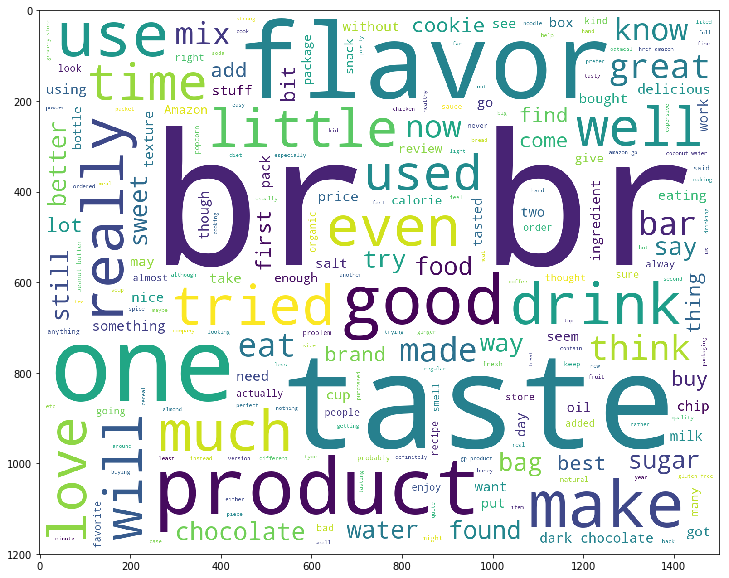

In [86]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

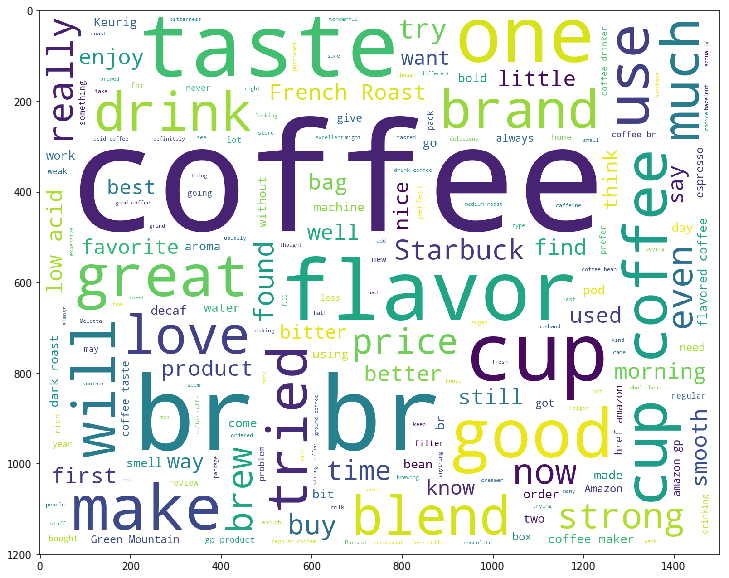

In [87]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster5))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [88]:
from sklearn.metrics.pairwise import pairwise_distances

import kmedoids

data1 = data[0:4000,:]
# distance matrix
D = pairwise_distances(data1, metric='euclidean')

# split into optimal value of clusters
M, C = kmedoids.kMedoids(D, optimal_k)

# Getting the reviews in all clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for label in C:
    for point_idx in C[label]:
        if label == 0 :
            cluster1.append(reviews[point_idx])
        elif label == 1:
            cluster2.append(reviews[point_idx])
        elif label == 2:
            cluster3.append(reviews[point_idx])
        elif label == 3:
            cluster4.append(reviews[point_idx])
        else :
            cluster5.append(reviews[point_idx])
            
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))

No. of reviews in Cluster-1 :  2

No. of reviews in Cluster-2 :  749

No. of reviews in Cluster-3 :  153

No. of reviews in Cluster-4 :  171

No. of reviews in Cluster-5 :  2925


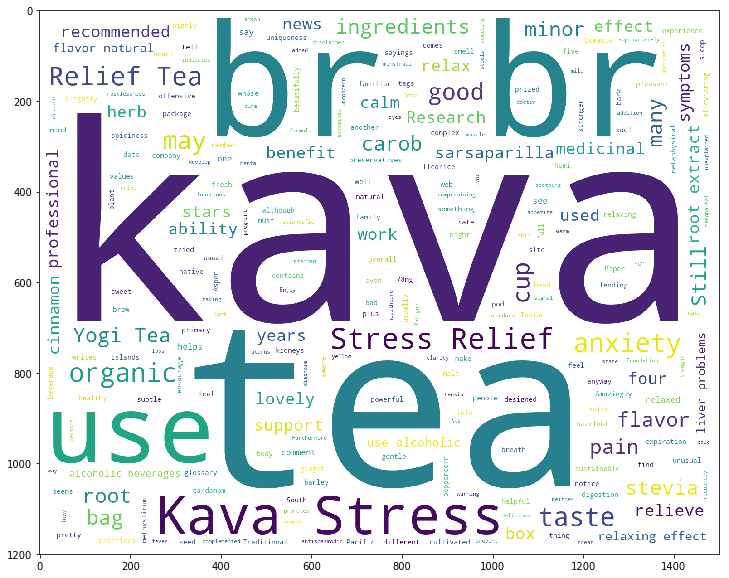

In [89]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

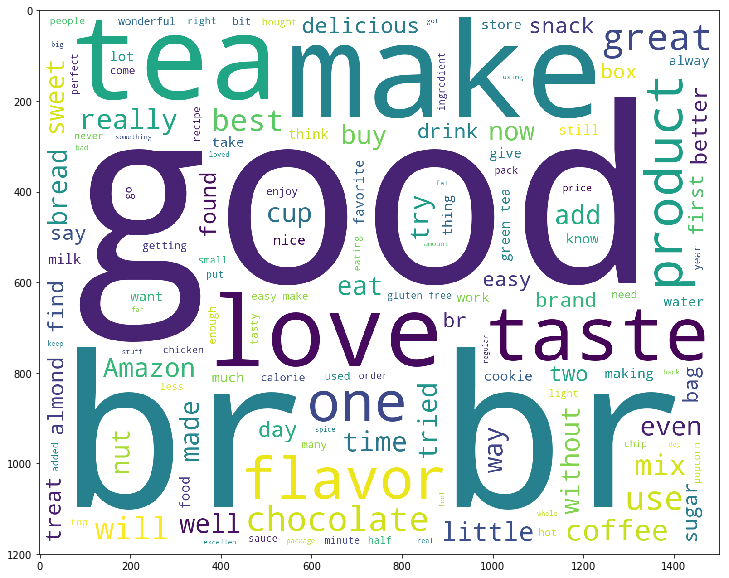

In [90]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

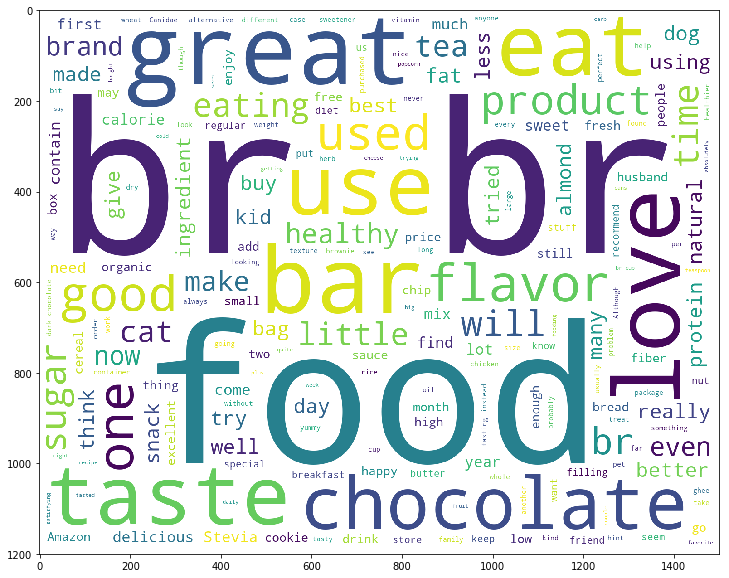

In [91]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

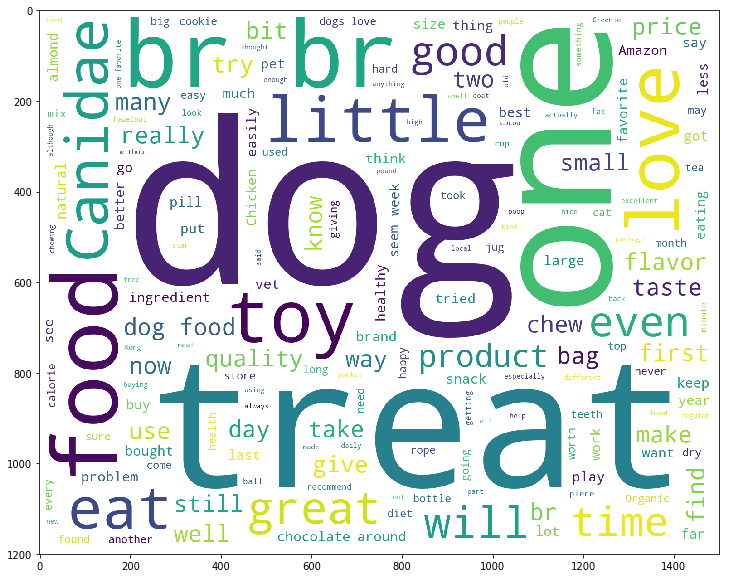

In [92]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

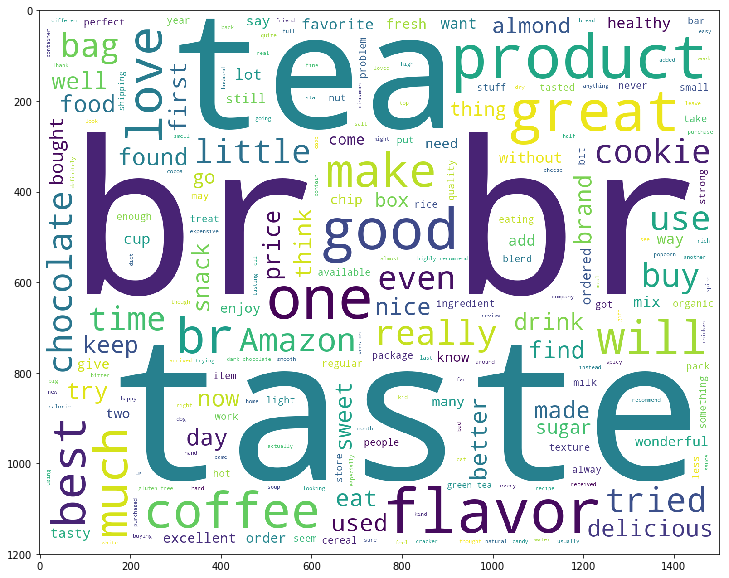

In [93]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster5))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [94]:
tf_idf_vect = TfidfVectorizer(min_df=1000)
data = tf_idf_vect.fit_transform(x)


In [95]:
k_values = [2,3,4,5,6,7,8,9,10]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(data)
    loss.append(kmeans.inertia_)

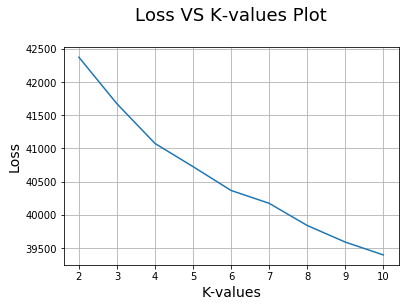

In [96]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()



In [97]:
optimal_k = 4
# Variable that will be used in the conclusion 
tfidf_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(data)

# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    else :
        cluster4.append(reviews[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  5371

No. of reviews in Cluster-2 :  4050

No. of reviews in Cluster-3 :  3400

No. of reviews in Cluster-4 :  33251


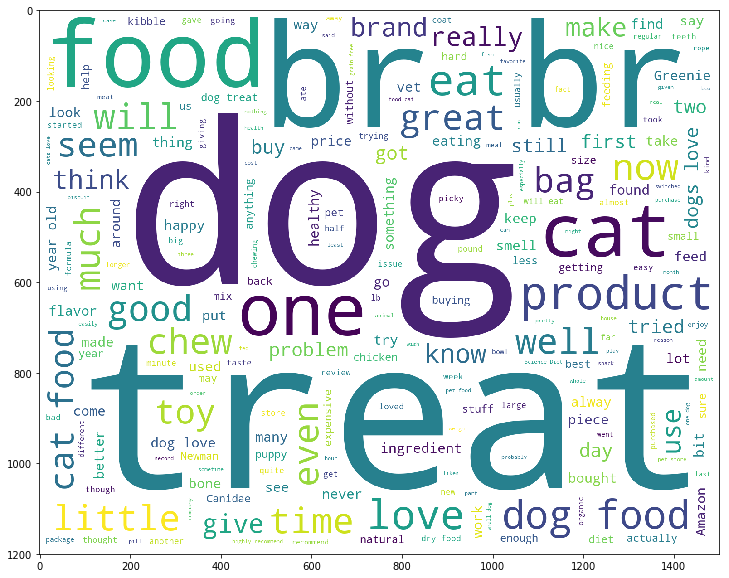

In [98]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

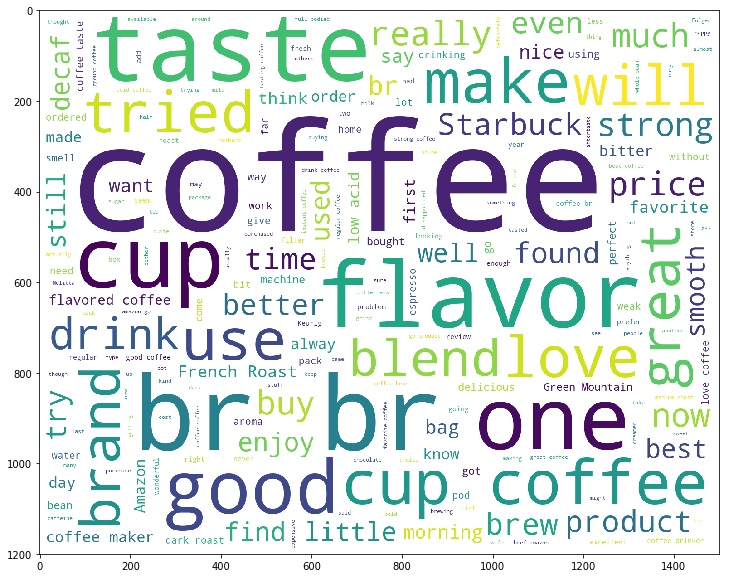

In [99]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

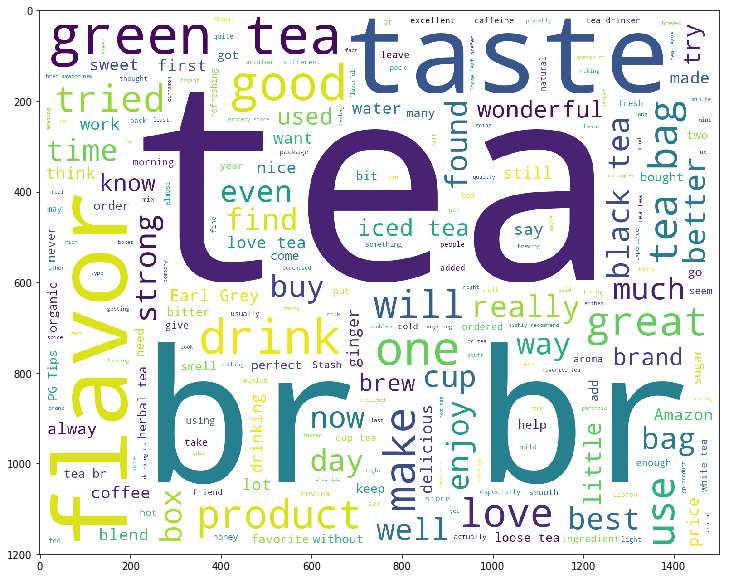

In [100]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

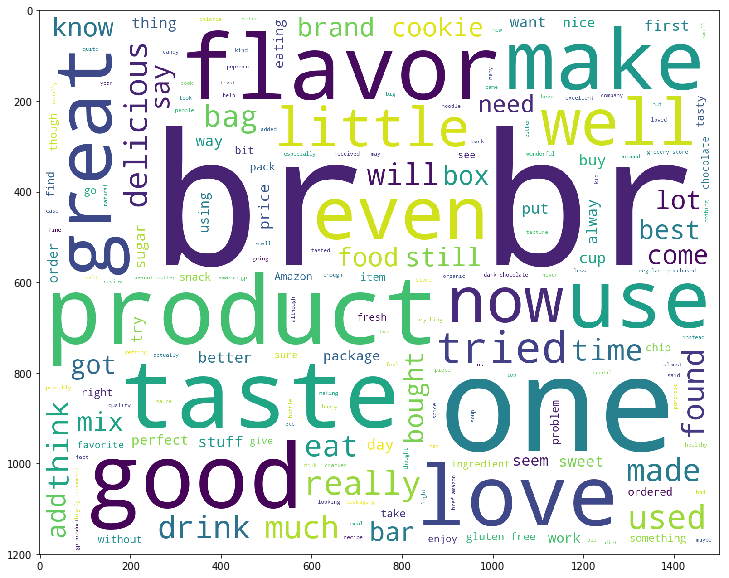

In [101]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [102]:
data1 = data[0:4000,:]
# distance matrix
D = pairwise_distances(data1, metric='euclidean')

# split into optimal value of  clusters
M, C = kmedoids.kMedoids(D, optimal_k)

# Getting the reviews in all clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for label in C:
    for point_idx in C[label]:
        if label == 0 :
            cluster1.append(reviews[point_idx])
        elif label == 1:
            cluster2.append(reviews[point_idx])
        elif label == 2:
            cluster3.append(reviews[point_idx])
        else :
            cluster4.append(reviews[point_idx])
            
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  214

No. of reviews in Cluster-2 :  1

No. of reviews in Cluster-3 :  3784

No. of reviews in Cluster-4 :  1


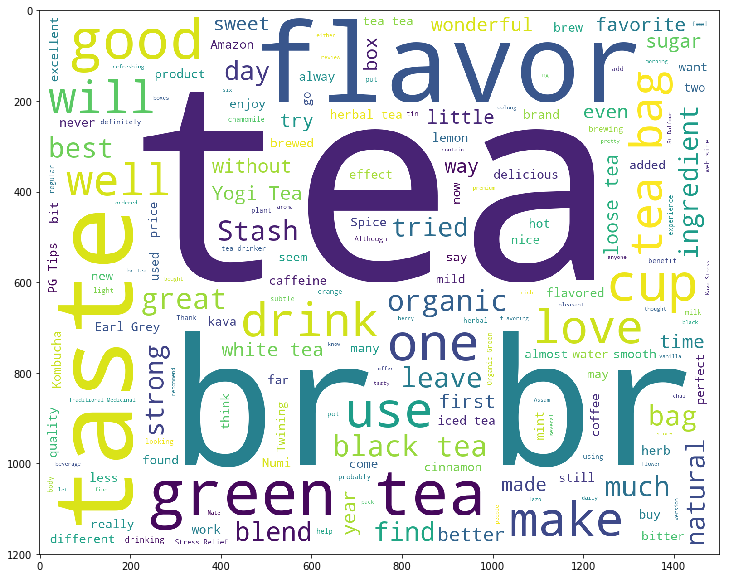

In [103]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

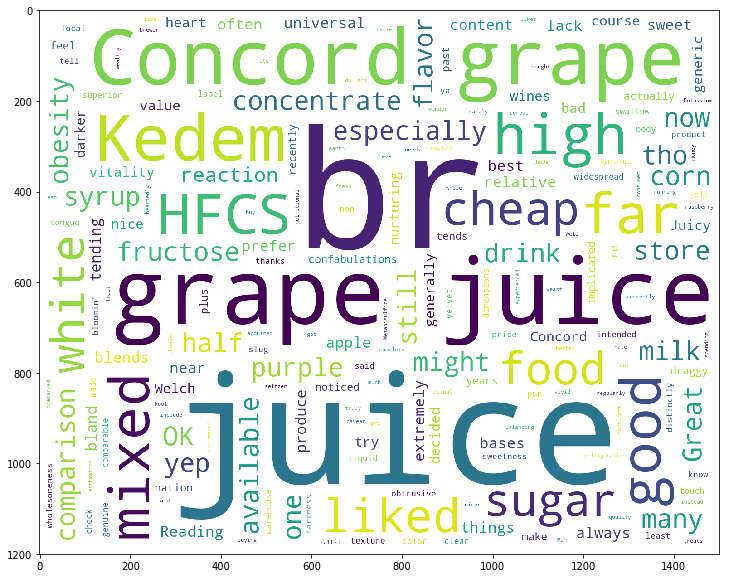

In [104]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

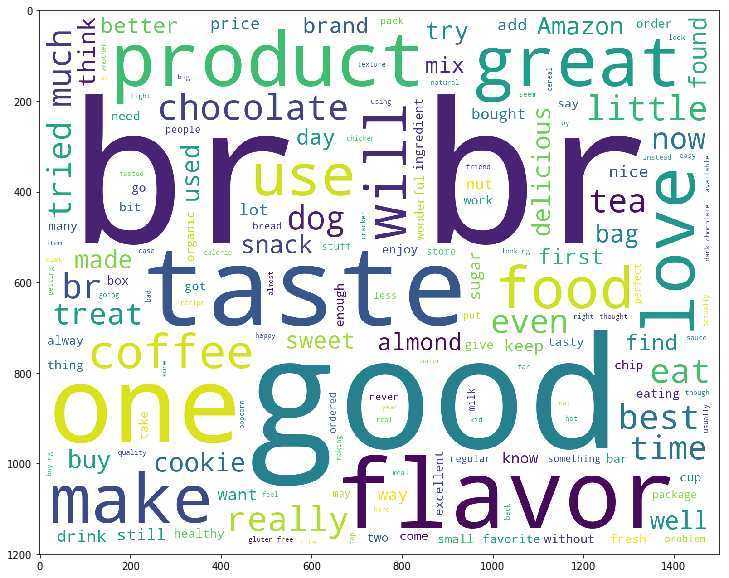

In [105]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

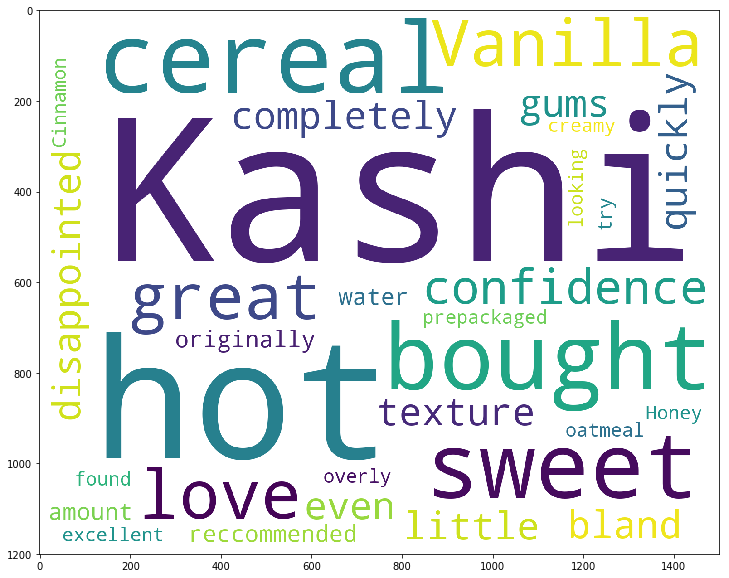

In [106]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [107]:
from sklearn.model_selection import train_test_split
X = final["Text"]


In [108]:
list_of_sent=[]
#for sent in final_40k['Text'].values:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
for sent in X:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
import gensim


In [109]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [110]:
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)



In [111]:
data = sent_vectors

In [112]:
k_values = [2,3,4,5,6,7,8,9,10]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(data)
    loss.append(kmeans.inertia_)

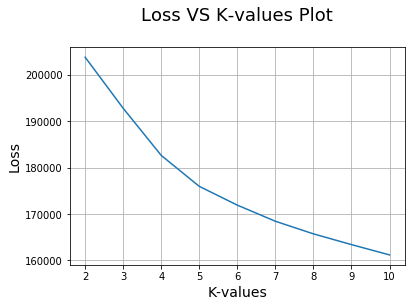

In [113]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [114]:
optimal_k = 4
# Variable that will be used in the conclusion 
avg_w2v_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(data)

# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    else :
        cluster4.append(reviews[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  14300

No. of reviews in Cluster-2 :  11801

No. of reviews in Cluster-3 :  12917

No. of reviews in Cluster-4 :  7054


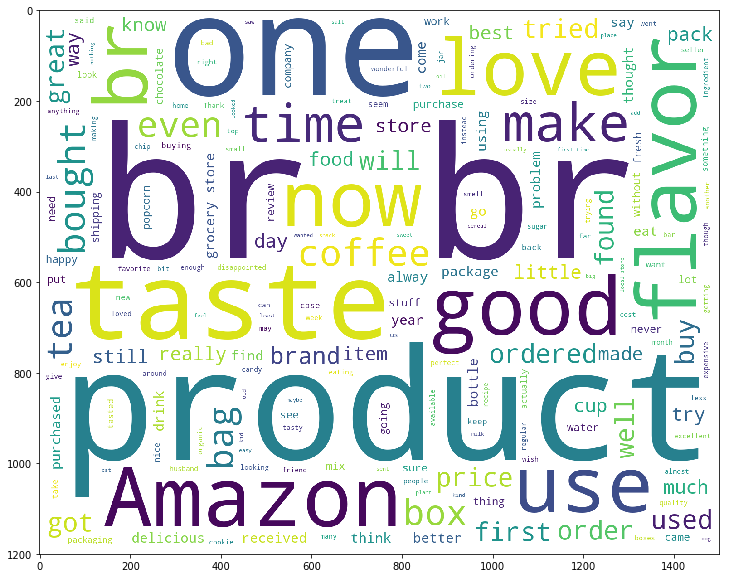

In [115]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

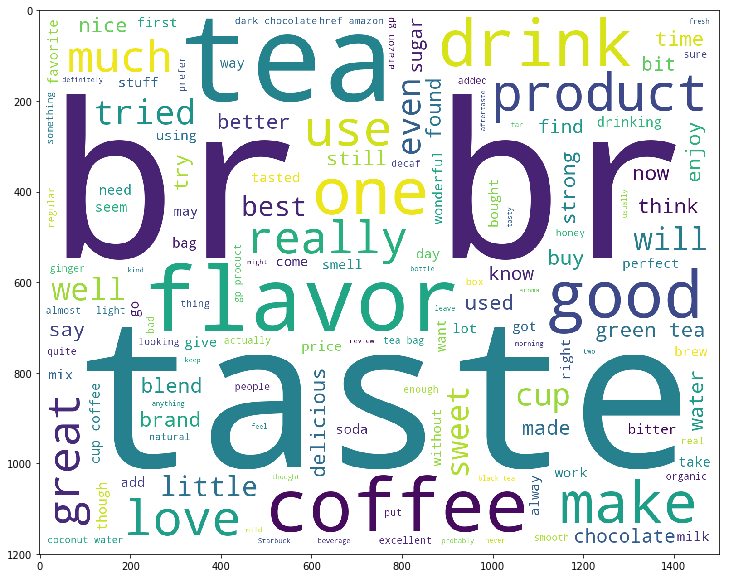

In [116]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

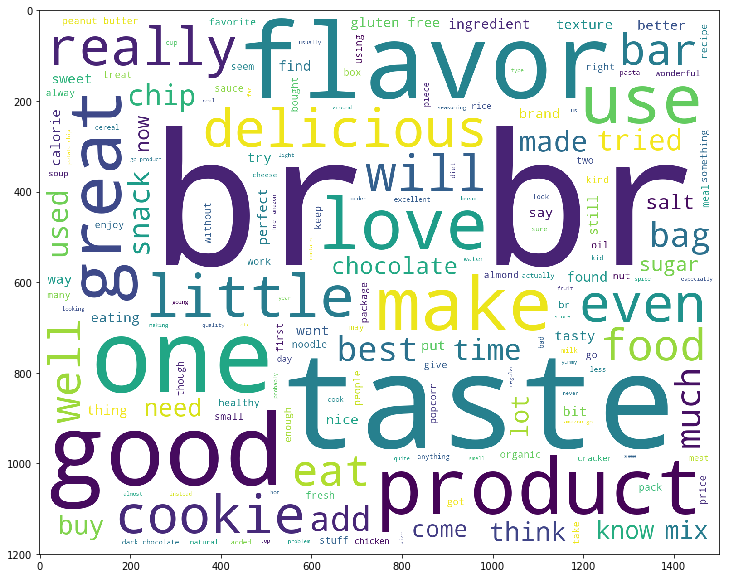

In [117]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

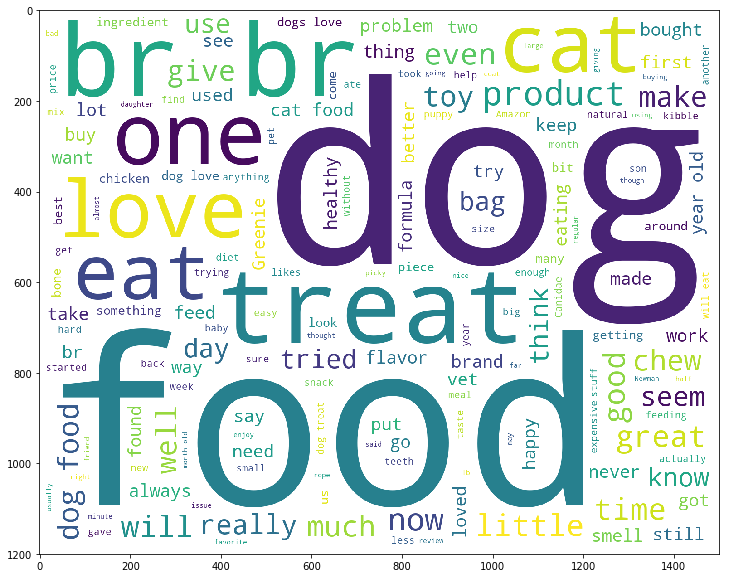

In [118]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [119]:
data1 = data[0:4000:]
# distance matrix
D = pairwise_distances(data1, metric='euclidean')

# split into optimal value of  clusters
M, C = kmedoids.kMedoids(D, optimal_k)

# Getting the reviews in all clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for label in C:
    for point_idx in C[label]:
        if label == 0 :
            cluster1.append(reviews[point_idx])
        elif label == 1:
            cluster2.append(reviews[point_idx])
        elif label == 2:
            cluster3.append(reviews[point_idx])
        else :
            cluster4.append(reviews[point_idx])
            
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  498

No. of reviews in Cluster-2 :  1093

No. of reviews in Cluster-3 :  1464

No. of reviews in Cluster-4 :  945


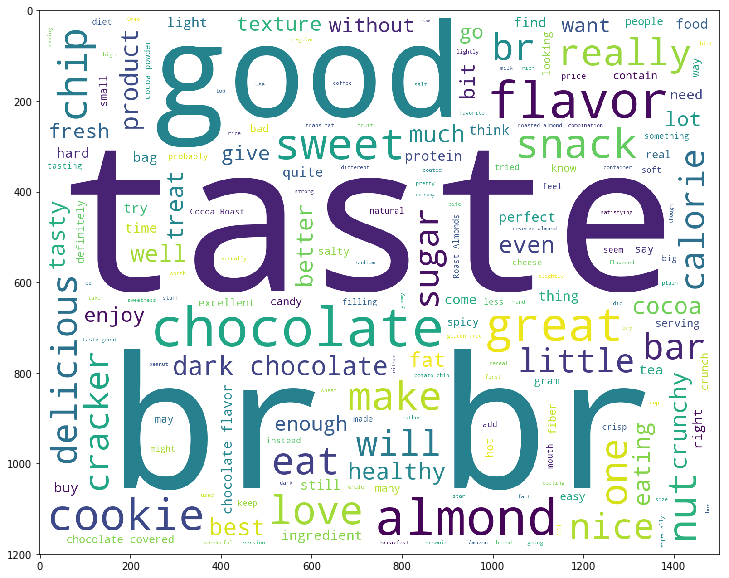

In [120]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

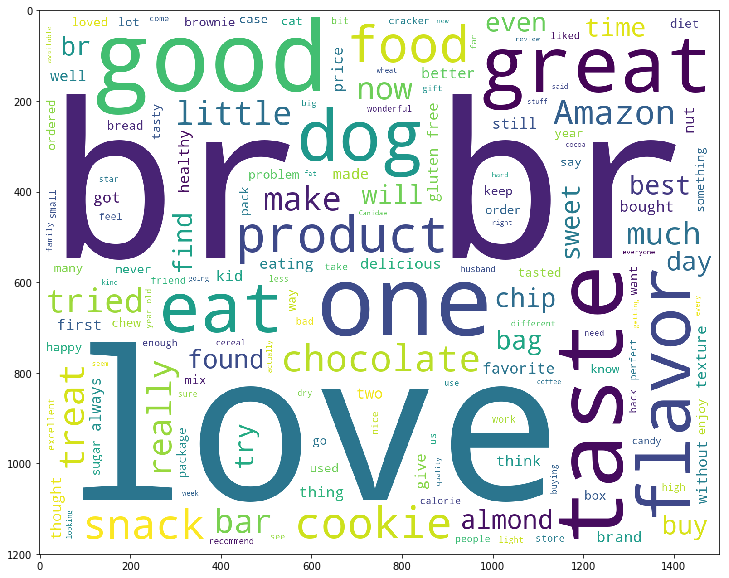

In [121]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

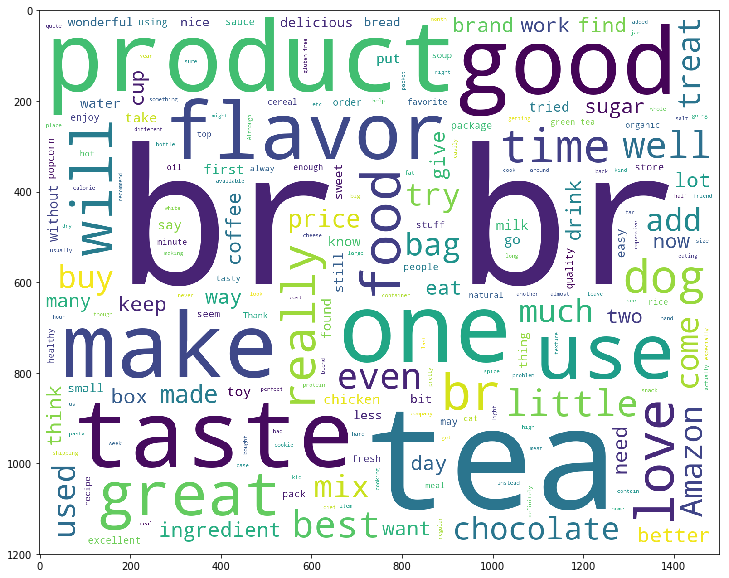

In [122]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

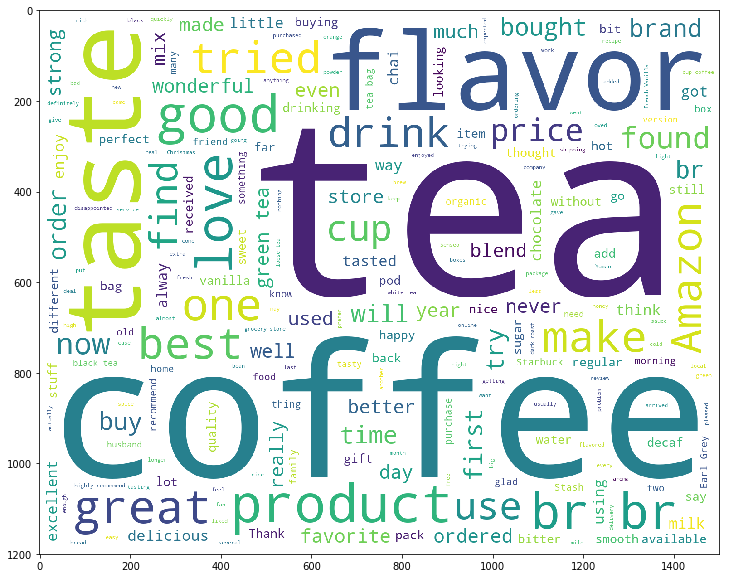

In [123]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [124]:
w2v_words = list(w2v_model.wv.vocab)
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1  

In [128]:
data=tfidf_sent_vectors
data = np.nan_to_num(data)

In [129]:
k_values = [2,3,4,5,6,7,8,9,10]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(data)
    loss.append(kmeans.inertia_)

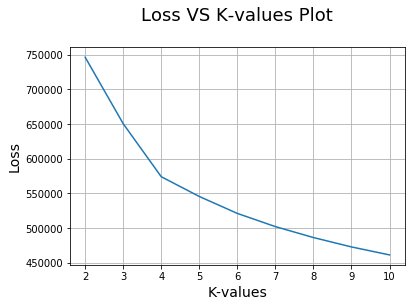

In [130]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

In [131]:
optimal_k = 4
# Variable that will be used in the conclusion 
tfidf_w2v_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(data)

# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(reviews[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(reviews[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(reviews[i])
    else :
        cluster4.append(reviews[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  23166

No. of reviews in Cluster-2 :  10527

No. of reviews in Cluster-3 :  3709

No. of reviews in Cluster-4 :  8670


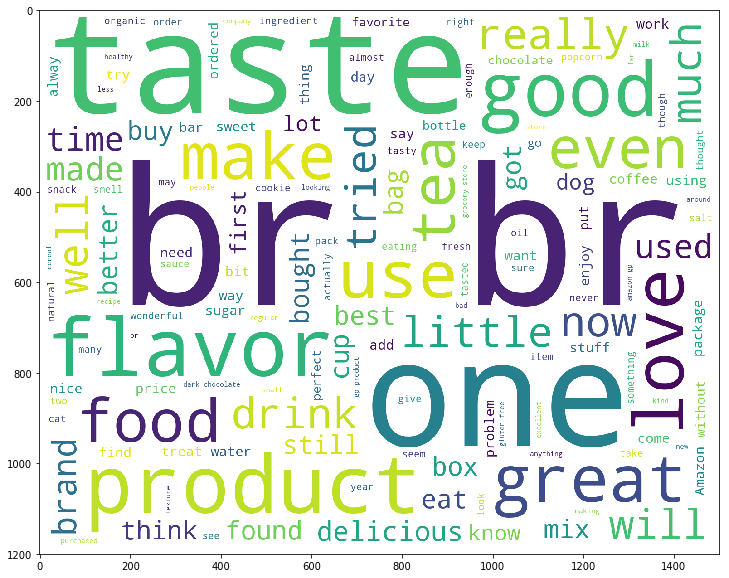

In [132]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

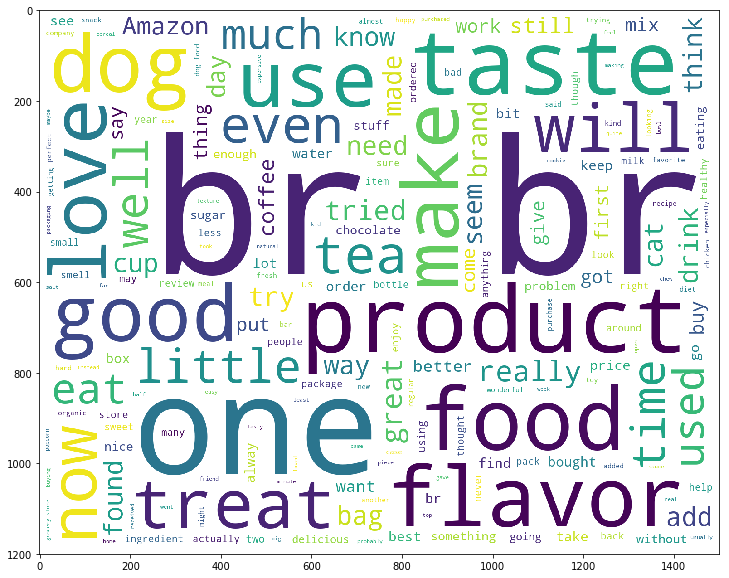

In [133]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

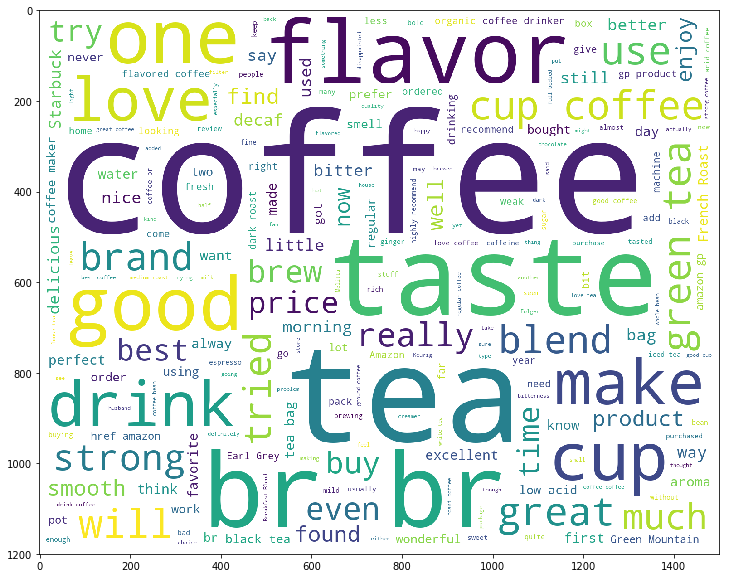

In [134]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

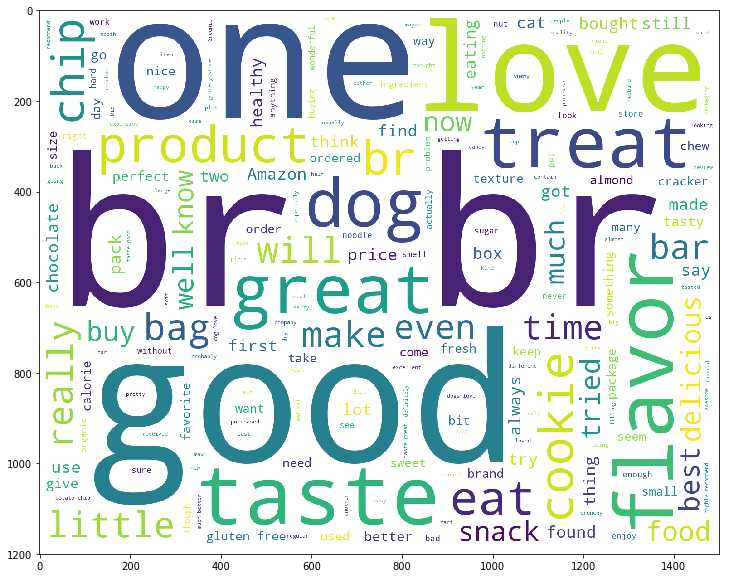

In [135]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)

In [136]:
data1 = data[0:4000:]
# distance matrix
D = pairwise_distances(data1, metric='euclidean')

# split into optimal value of  clusters
M, C = kmedoids.kMedoids(D, optimal_k)

# Getting the reviews in all clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

for label in C:
    for point_idx in C[label]:
        if label == 0 :
            cluster1.append(reviews[point_idx])
        elif label == 1:
            cluster2.append(reviews[point_idx])
        elif label == 2:
            cluster3.append(reviews[point_idx])
        else :
            cluster4.append(reviews[point_idx])
            
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))

No. of reviews in Cluster-1 :  876

No. of reviews in Cluster-2 :  822

No. of reviews in Cluster-3 :  1492

No. of reviews in Cluster-4 :  810


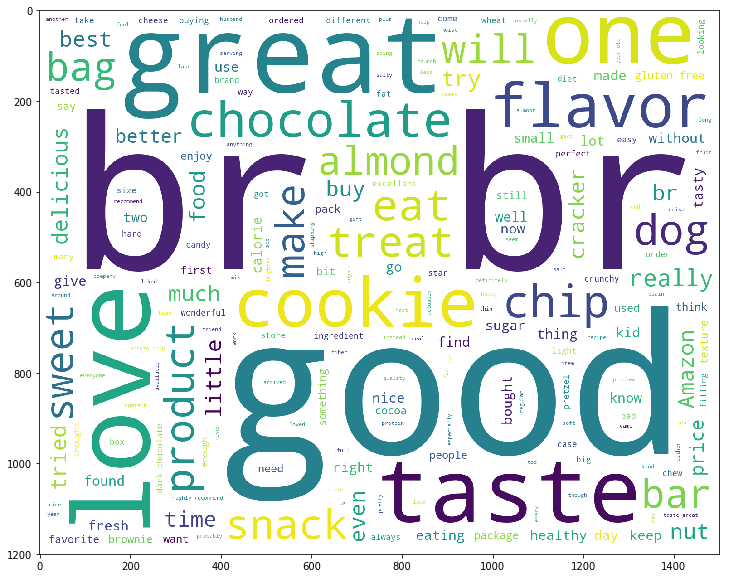

In [137]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster1))

plt.figure(figsize=(20,10))
plt.imshow(wc)

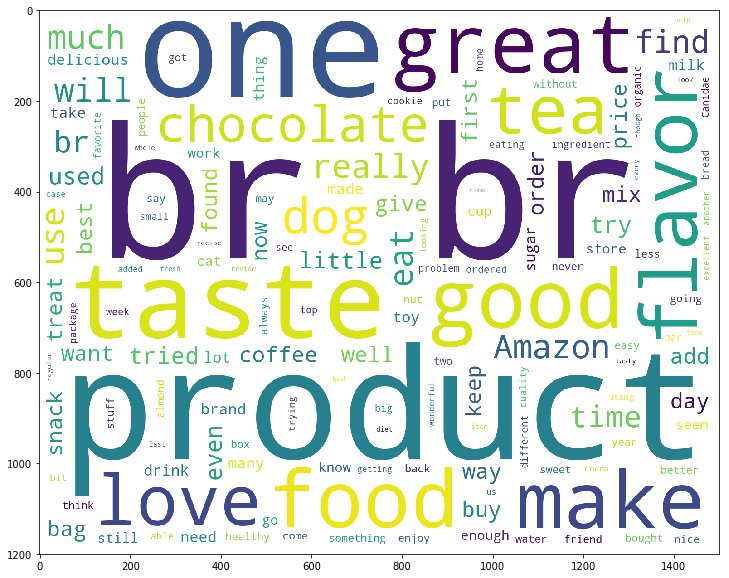

In [138]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster2))

plt.figure(figsize=(20,10))
plt.imshow(wc)

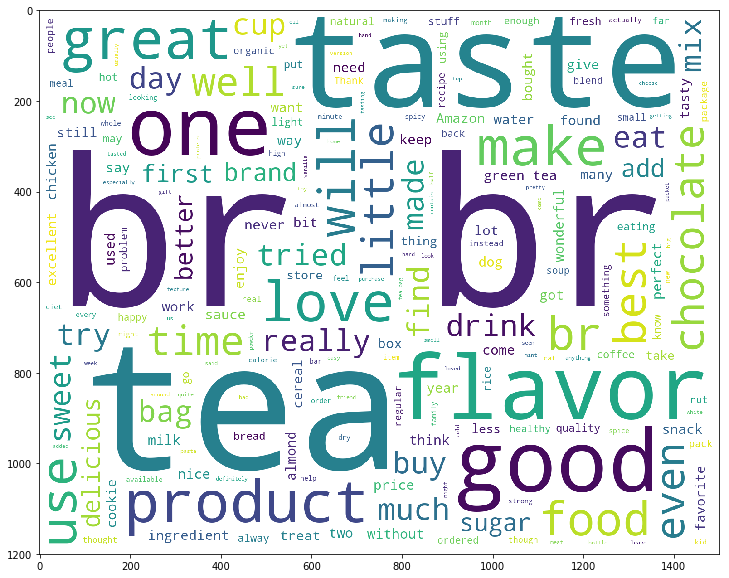

In [139]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster3))

plt.figure(figsize=(20,10))
plt.imshow(wc)

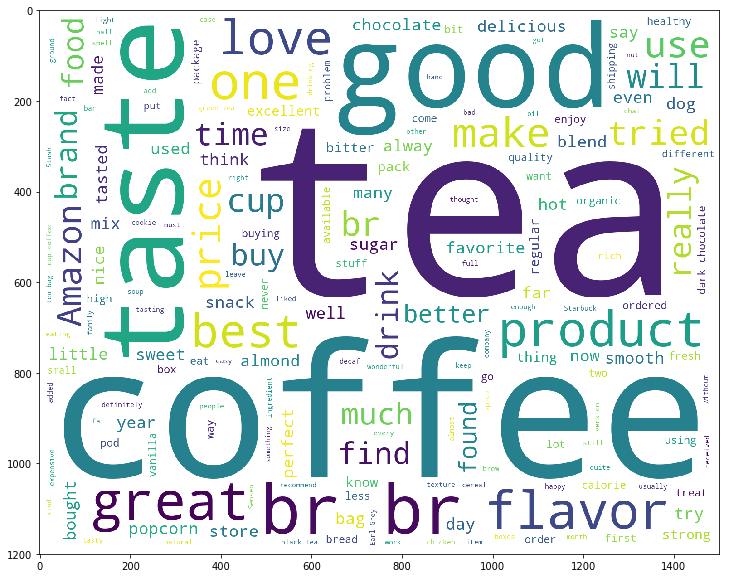

In [140]:
wc = WordCloud(max_words=1000, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(cluster4))

plt.figure(figsize=(20,10))
plt.imshow(wc)